In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import homography, rectification, my_types, utils

In [5]:
DATA = Path("data")

# Pick Correspondences

In [6]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [7]:
im1 = my_types.to_img_arr(im1_name)
im2 = my_types.to_img_arr(im2_name)
im3 = my_types.to_img_arr(im3_name)

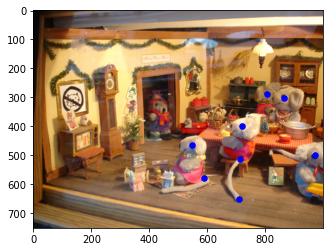

In [8]:
utils.plot_pts(im1, im1_pts)

# Homography Matrix

In [9]:
# find homographic transformation matrix
H = homography.homo_matrix(im1_pts, im2_pts)
H

array([[ 1.16973903e+00, -4.41763292e-02, -5.34308084e+02],
       [-6.91450044e-03,  1.09612772e+00, -1.11329462e+01],
       [ 2.12107232e-04, -1.93414405e-05,  1.00000000e+00]])

# Forward Warping

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(837, 1100, 3)
0 0
837 1099
=====interpolate=====


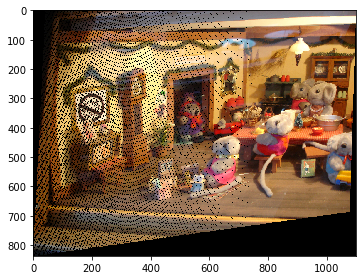

In [13]:
warp1 = homography.forward_warp(im1, H)
io.imshow(warp1)

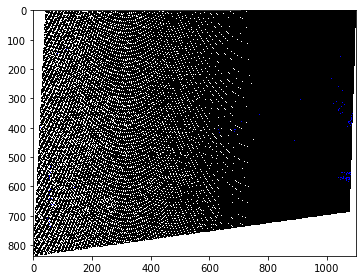

In [222]:
mask = np.ma.make_mask(warp1==0)
io.imshow(mask.astype(np.int).astype(np.float))

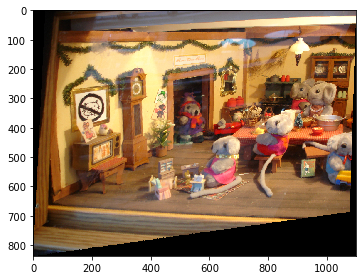

In [14]:
filled = homography.fill_holes(warp1, im1, H)
io.imshow(filled)

# Inverse Warping

====target====
(837, 1100, 3)
1 1
835 1098
=====src=====
(750, 1000, 3)
0 0
835 759
=====interpolate=====


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


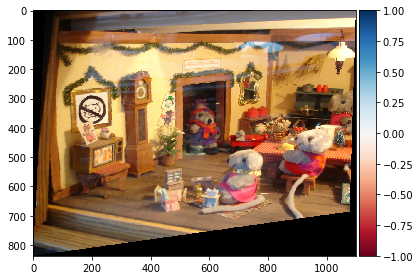

In [15]:
warp1 = homography.inverse_warp(im1, H)
io.imshow(warp1)

# Image Rectification

In [17]:
PICK_NEW = True
SAVE_PTS = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 4)
    im2_pts = utils.pick_points(im2_name, 4)
    # im3_pts = utils.pick_points(im3_name, 8)
    if SAVE_PTS:
        utils.save_points(im1_pts, im1_name)
        utils.save_points(im2_pts, im2_name)
        # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

Please select 4 points in image.
Picked 4 points successfully.
Please select 4 points in image.
Picked 4 points successfully.


In [18]:
im1_pts

array([[602.84528076,  95.25145223],
       [606.14112388, 324.31254892],
       [887.93571046, 347.38345075],
       [878.04818111,  98.54729535]])

In [19]:
im2_pts

array([[138.82172441,  70.34602117],
       [156.38949341, 281.15924916],
       [415.11481868, 297.12994825],
       [405.53239922,  68.74895126]])

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.b

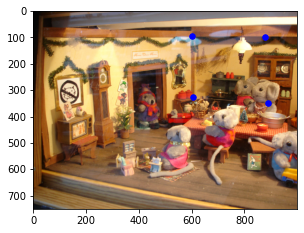

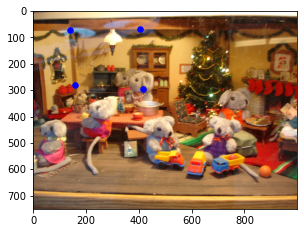

In [22]:
utils.plot_pts(im1, im1_pts)
utils.plot_pts(im2, im2_pts)

In [16]:
start_h = 50
start_w = 80
h = 250
w = 300
frontal_plane = [[start_h, start_w], [start_h + h, 0], [0, start_w + w], [start_h + h, start_w + w]]

In [ ]:

h_matrix = homography.homo_matrix(im1.pts, )

In [ ]:
warp_1 = homography.forward_warp(im1, h_matrix)